<a href="https://colab.research.google.com/github/XiaoxueRan/hku_phys3151_2022/blob/main/clustering/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

The general concept of clustering is to convert your data from a continuous space into a discrete groups. Since this is a unsupervised learning algorithm, the purpose of clustering is to determine underlying structures in the data rather than trying to find any specific insight into your data.

## K-means clustering

The clustering method that this notebook will be focusing on is the K-means clustering. This is one of the most fundamental clustering technique.

### Example 1

The first example will make use of the data from the previous (PCA) notebook. We will be determining the classes of wines in each category. 
<br>Data source:https://archive.ics.uci.edu/ml/datasets/Wine
<br><br>First, import and preprocess the data.

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt  
!git clone https://github.com/XiaoxueRan/hku_phys3151_2022

Cloning into 'hku_phys3151_2022'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 217 (delta 109), reused 64 (delta 15), pack-reused 0
Receiving objects: 100% (217/217), 8.23 MiB | 6.11 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [2]:
df = pd.read_csv("/content/hku_phys3151_2022/clustering/clustering-example-1.csv", sep=",")
print(df)

     Type  Alcohol  Malic-Acid   Ash  Alcalinity  Magnesium  Total-Phenols  \
0       1    14.23        1.71  2.43        15.6        127           2.80   
1       1    13.20        1.78  2.14        11.2        100           2.65   
2       1    13.16        2.36  2.67        18.6        101           2.80   
3       1    14.37        1.95  2.50        16.8        113           3.85   
4       1    13.24        2.59  2.87        21.0        118           2.80   
..    ...      ...         ...   ...         ...        ...            ...   
173     3    13.71        5.65  2.45        20.5         95           1.68   
174     3    13.40        3.91  2.48        23.0        102           1.80   
175     3    13.27        4.28  2.26        20.0        120           1.59   
176     3    13.17        2.59  2.37        20.0        120           1.65   
177     3    14.13        4.10  2.74        24.5         96           2.05   

     Flavanoids  Nonflavanoid-phenols  Proanthocyanins  Color-I

In [3]:
X = df.drop(columns=['Type'])
y = df['Type']
from sklearn import preprocessing                      #Feature scaling
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
X = X_scaled
print(X_scaled.shape)                              #look at the size of the data

(178, 13)


#### Three Dimensions

Since we want to make the result of clustering easily visualizable, we will firstly reduce the data to 3 dimensions using PCA.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print(eigenvalues)
principalX = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
finaldf = pd.concat([principalX, y], axis = 1)

[2.13189786 1.2771651  0.82311103]


Before clustering, we can plot the dimensionally reduced data to have a oveview.

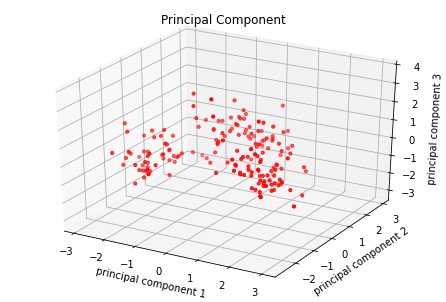

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig=plt.figure()
ax = Axes3D(fig)

x =principalX['principal component 1']
y =principalX['principal component 2']
z =principalX['principal component 3']
ax.scatter(x, y, z, c='r', marker='o',s=10)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.set_title('Principal Component')
plt.show()

Next, we apply the KMeans function from the sklearn package and then show the results in the figure below.

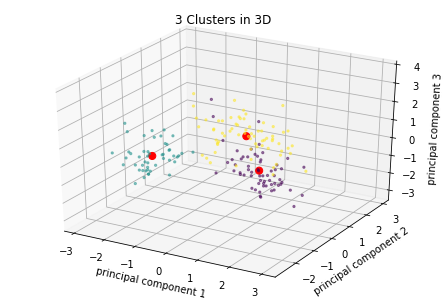

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(principalX)
centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
x =principalX['principal component 1']
y =principalX['principal component 2']
z =principalX['principal component 3']
ax.scatter(x, y, z, c= kmeans.labels_.astype(float),s=5, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2], c='red', s=50, alpha=1)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.set_title('3 Clusters in 3D')

plt.show()

The wine is now indeed split into 3 categories and this plot shows that the 3 categories are clustered around different parts of this principal component space. <br>The little dots are datapoints while the large red dots are where the 3 centroids are located. 

For comparison, let's try to apply KMeans clustering with 4 clusters this time.

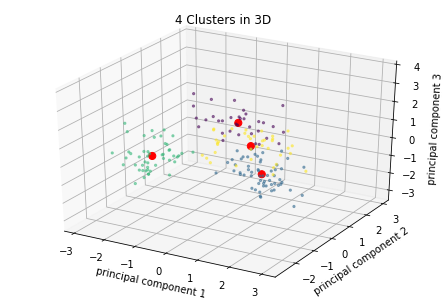

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(principalX)
centroids = kmeans.cluster_centers_


fig = plt.figure()
ax = Axes3D(fig)
x =principalX['principal component 1']
y =principalX['principal component 2']
z =principalX['principal component 3']
ax.scatter(x, y, z, c= kmeans.labels_.astype(float),s=5, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2], c='red', s=50, alpha=1)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.set_title('4 Clusters in 3D')
plt.show()

As this figure shows, the points are less clearly differentiable because the data is not actually split into 4 categories. Some categories are still far out but the others seem to be split in a continuum.

It's always of significance to determine the number of clusters, namely K.
    <br><br> As we often do in the first example, here we use an existent function to judge different Ks -- Calinski-Harabasz Index. The larger the index, the better the clustering.

In [10]:
from sklearn import metrics
Knumber=[]
CHnumber=[]
for i in range(2,9):
    Knumber.append(i)
    y_pred = KMeans(n_clusters=i).fit_predict(principalX)
    CHnumber.append(metrics.calinski_harabasz_score(principalX,y_pred))

Now that we have measure a range of K numbers, plot is to have a view and select the best K for clustering this 3D dataset.

Text(0, 0.5, 'Calinski-Harabasz Index')

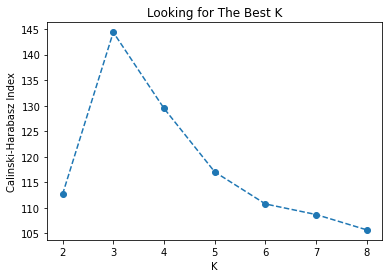

In [ ]:
plt.plot(Knumber,CHnumber,marker='o',ls='--')
plt.title('Looking for The Best K')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Index')

This result shows that the data should best be split into 3 clusters, which is much better than the case of 4 cluster, just as what we our figures ploted before this measure showed.

#### Two Dimensions

After 3D case, we still want to see if clustering work well when we reduce our data into 2D.

Since we have already showed a way to measure different clusterings, use it.

Text(0, 0.5, 'Calinski-Harabasz Index')

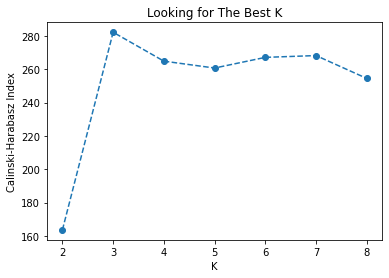

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X)
principalX2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])
from sklearn import metrics
Knumber2=[]
CHnumber2=[]
for i in range(2,9):
    Knumber2.append(i)
    y_pred = KMeans(n_clusters=i).fit_predict(principalX2)
    CHnumber2.append(metrics.calinski_harabasz_score(principalX2,y_pred))
plt.plot(Knumber2,CHnumber2,marker='o',ls='--')
plt.title('Looking for The Best K')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Index')


As the figure shows, it's still the best to have three clusters in 2D, then plot this case.

centers are: [[-1.82965927 -0.72185697]
 [ 1.49627531 -0.70429694]
 [ 0.03090649  1.20873968]]


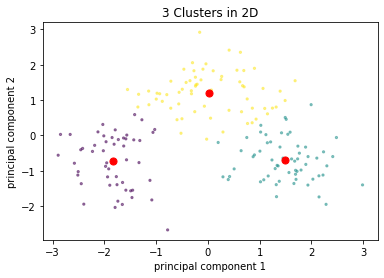

In [ ]:
kmeans = KMeans(n_clusters=3).fit(principalX2)
centroids = kmeans.cluster_centers_
print('centers are:',centroids)

fig= plt.figure()
x =principalX2['principal component 1']
y =principalX2['principal component 2']

plt.scatter(x, y, c= kmeans.labels_.astype(float),s=5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=1)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('3 Clusters in 2D')

plt.show()

It's true that the data are well classified.

### Example 2

As with all the other notebooks, in the second example, a version of the algorithm will be written from scratch to allow for more detailed examination of the method.

For this example we will be using data relating to Facebook live sellers in Thailand. The data includes information on the type of posts as well as the number of likes, reacts to those posts etc.
<br>Data Source:https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

#### Data Preparation

First of all, import the packages which will be used and preprocess the initial data.

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

df = pd.read_csv("/content/hku_phys3151_2022/clustering/clustering-example-2.csv", sep=",")

X = df.drop(columns=['status_id','status_published','status_type'])
#y = df[df.columns[-1]]
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
X = X_scaled
print(X_scaled.shape)                                 #look at the size of the data

(7050, 9)


#### Pricipal Components

Now, we will again use PCA to reduce this data to 3D for ease visualization.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

Before clustering, we can have a look at the figure of reduced data in 3D.

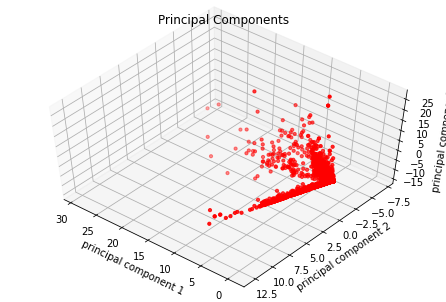

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x =principalComponents[:,0]
y =principalComponents[:,1]
z =principalComponents[:,2]
ax.scatter(x, y, z, c='r', marker='o',s=10)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.set_title('Principal Components')
ax.view_init(elev=55,azim=130)           #view from different perspective
plt.show()

#### Clustering Function

Now, we define a function to realize K means clustering.
<br>Remember the inner logic is that K means is a repeatedly 2-step process: 
1. Cluster assignment according to the centroids set before. 
2.Take each centroid and move to the average of the correspondingly assigned data-points.

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # First we need to randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    # Next, we have to loop this algorithm to approach the optimal position of the cluster centers.
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

#### Distortion

Like the first example ,we want a measurement for the clustering and here we define the distortion(distortion cost function):
    <br>
$$J=\frac{1}{m}\sum_{i=1}^m||x^{(i)}-\mu_{c^{i}}||^2$$

In [ ]:
def distortion(X,n_clusters):
    centers, labels=find_clusters(principalComponents, n_clusters)
    cost=0
    for i in range(0,len(X)):
        cost=cost+np.square(np.linalg.norm(X[i]-centers[labels[i]]))
    cost=cost/len(X)
    return cost

#### Elbow Method

Choosing the number of clusters is of great importance.
<br><br>Here we introduce Elbow method, which is to vary K and compute cost function at a range of K values. And while the cost_function decrease, we choose the elbow point in the plot as K.
<br>Note, it can happen that you don't get a a nice line -> no clear elbow on curve.

Text(0.5, 1.0, 'J vs K')

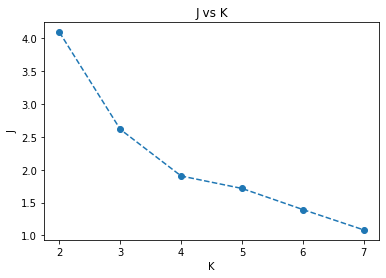

In [ ]:
Kn=[]
distortions=[]
for i in range(2,8):
    Kn.append(i)
    distortions.append(distortion(principalComponents,i))
plt.plot(Kn,distortions,ls='--',marker='o')
plt.xlabel('K')
plt.ylabel('J')
plt.title('J vs K')

In this case, K=4 would probably be the elbow.

#### Clustering Visualization

So, choose K to be 4 and plot the clusters.

In [ ]:
centers, labels = find_clusters(principalComponents, 4)
print(centers)

[[ 1.68219659  4.62725424  0.46382005]
 [11.71909405 -1.91858786 -1.49220877]
 [-0.55520261 -0.14639031 -0.08425304]
 [ 2.79595995 -1.15839272  0.79972746]]


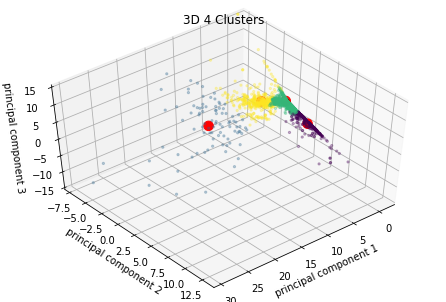

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
x =principalComponents[ : ,0]
y =principalComponents[ : ,1]
z =principalComponents[ : ,2]
ax.scatter(x, y, z, c= labels,s=5, alpha=0.3)
ax.scatter(centers[:,0], centers[:,1],centers[:,2],c='red', s=90, alpha=1)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.set_zlim(-15,15)
ax.set_title('3D 4 Clusters')
ax.view_init(elev=50,azim=50)           #view from different perspective

plt.show()

Generally speaking, this is an acceptable classification.

#### 2D

For clearer visulaization, repeat the process above and get a 2D figure.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

Before clustering, we use elbow method again.

Text(0.5, 1.0, 'J vs K')

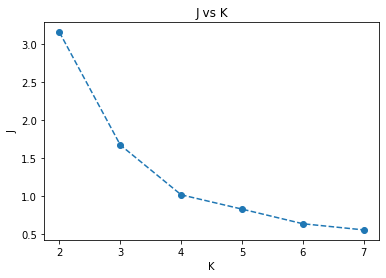

In [ ]:
Kn2=[]
distortions2=[]
for i in range(2,8):
    Kn2.append(i)
    distortions2.append(distortion(principalComponents,i))
plt.plot(Kn2,distortions2,ls='--',marker='o')
plt.xlabel('K')
plt.ylabel('J')
plt.title('J vs K')

Take K=4 again, and visualize the cluster.

[[ 1.67842921  4.61382434]
 [11.30811173 -1.90821343]
 [-0.57825821 -0.13979549]
 [ 2.53168436 -1.09561241]]


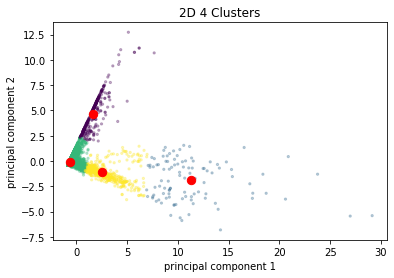

In [ ]:
centers, labels = find_clusters(principalComponents, 4)
print(centers)

x =principalComponents[ : ,0]
y =principalComponents[ : ,1]
plt.scatter(x, y, c= labels,s=5, alpha=0.3)
plt.scatter(centers[:,0], centers[:,1],c='red', s=70, alpha=1)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('2D 4 Clusters')

plt.show()

Now appears the clearly classified clusters.